# Predict The Flight Ticket Price Hackathon

In [1]:
#import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the required data set

df = pd.read_excel('Data_Train.xlsx')

## 1. Cleaning process

The main idea here is to have some insights of the relationships between the variables.

- Converting the Total Stops column into numerical data.
- Split the Route column into multiple variables, can illustrate the route into powerful plot later on. So we can count the most important routes/cities. Then we can highlight the opportunities based upon.
- 

In [3]:
#Splitting the Route column into multiple columns

data = df['Route'].str.split('→', expand=True)
data.columns = ['Route01', 'Route02', 'Route03', 'Route04', 'Route05', 'Route06']

In [4]:
#Concatenate the original dataset & Route dataset

df1 = pd.concat([df, data], axis= 1)

In [5]:
#checking the uniqueness in [Total Stops] variable

df1['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [6]:
#Splitting the Total Stops column into 2 columns [numeric value & string]
charData = df1['Total_Stops'].str.split(' ', expand=True)

In [7]:
#Rename the new dataset
charData.columns = ['Stops', 'Anything']

In [8]:
#Converting the "non-stop" value into 0
charData['Total_Stops'] = charData['Stops'].replace({'non-stop': 0})

In [9]:
#Keeping only the numeric column
charData = charData.drop('Stops', 1)
charData = charData.drop('Anything', 1)

In [10]:
df1 = df1.drop('Route', 1)
df1 = df1.drop('Total_Stops', 1)

In [11]:
#Building the new dataset after appending the new columns
df2 = pd.concat([df1, charData], axis= 1)

In [12]:
df2

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Route01,Route02,Route03,Route04,Route05,Route06,Total_Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,No info,3897,BLR,DEL,None,None,None,None,0
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,No info,7662,CCU,IXR,BBI,BLR,None,None,2
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,No info,13882,DEL,LKO,BOM,COK,None,None,2
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,No info,6218,CCU,NAG,BLR,None,None,None,1
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,No info,13302,BLR,NAG,DEL,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,No info,4107,CCU,BLR,None,None,None,None,0
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,No info,4145,CCU,BLR,None,None,None,None,0
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,No info,7229,BLR,DEL,None,None,None,None,0
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,No info,12648,BLR,DEL,None,None,None,None,0


## 2. Visulaization part

<Figure size 3600x2880 with 0 Axes>

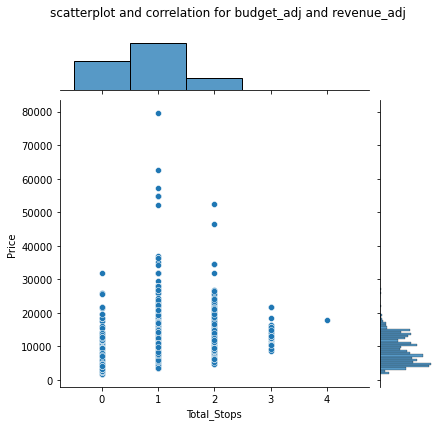

In [13]:
plt.figure(figsize = (50,40))
fig1 = sns.jointplot(x = 'Total_Stops', y = 'Price', data = df2, kind = "scatter")
fig1.fig.suptitle('scatterplot and correlation for budget_adj and revenue_adj')
fig1.fig.subplots_adjust(top=0.90) # Reduce plot to make room 


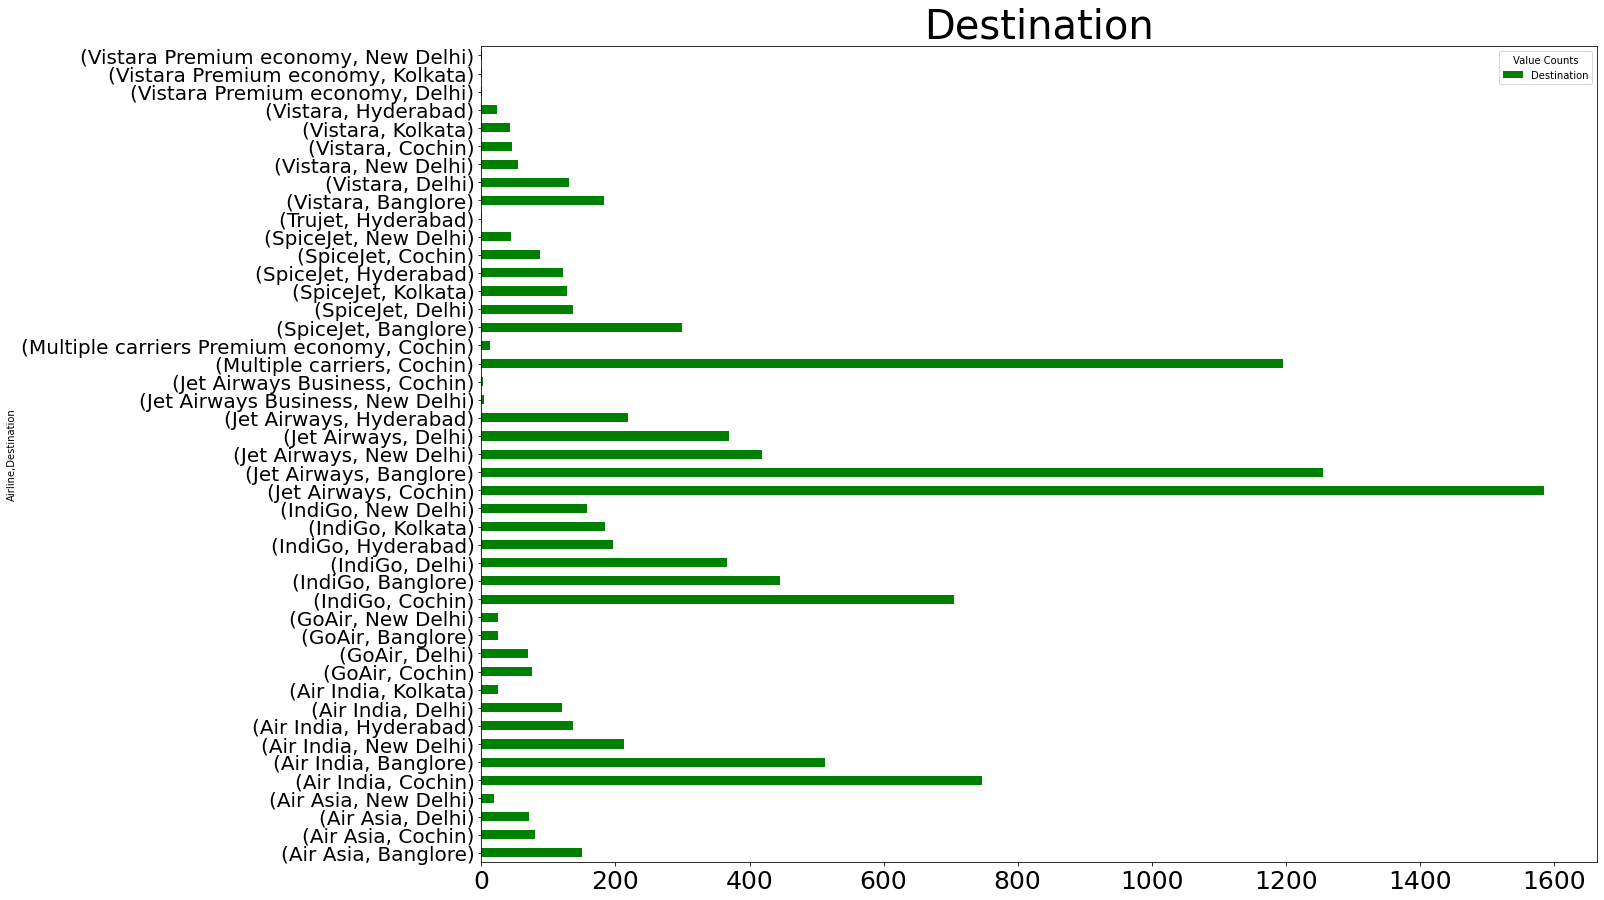

In [14]:
plt.figure(figsize = (20,15))

df1.groupby('Airline')['Destination'].value_counts().plot.barh(color = 'green')
plt.legend(title = 'Value Counts')
# Fontsize of tick labels
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)
plt.title('Destination', fontsize=40)
plt.show()

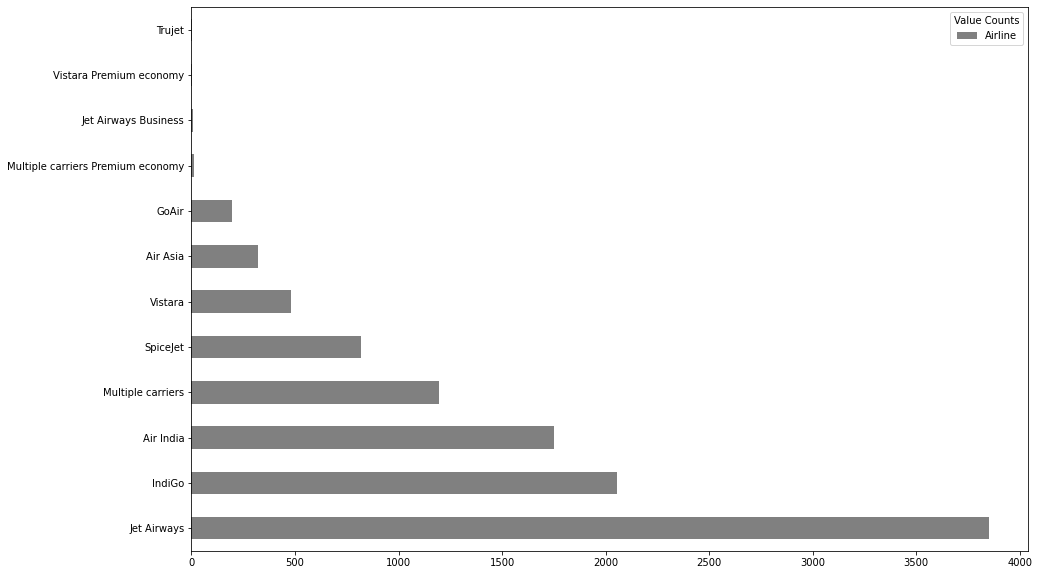

In [15]:
plt.figure(figsize = (15,10))
df['Airline'].value_counts().plot.barh(color = 'grey')
plt.legend(title = 'Value Counts')
plt.show()

In [19]:
def Bar_plot(arg1):
    df2.groupby('Source')[arg1].value_counts().plot.bar()

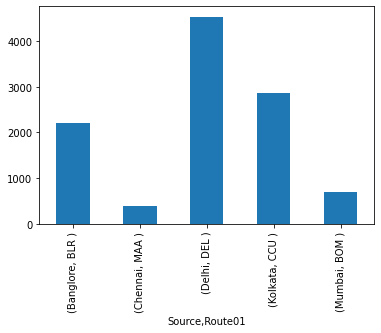

In [20]:
Bar_plot('Route01')

In [16]:
df.groupby('Destination')['Route'].value_counts().head(30)

#co-relation between these variables:
# Source - Dest. - Route - Total Stops

Destination  Route                      
Banglore     CCU → BOM → BLR                979
             CCU → BLR                      724
             CCU → DEL → BLR                565
             CCU → MAA → BLR                 65
             CCU → HYD → BLR                 53
             CCU → BBI → BLR                 50
             CCU → IXR → DEL → BLR           46
             CCU → BBI → BOM → BLR           42
             CCU → GAU → BLR                 41
             CCU → GAU → DEL → BLR           39
             CCU → DEL → COK → BLR           36
             CCU → BOM → COK → BLR           30
             CCU → DEL → AMD → BLR           21
             CCU → IXB → BLR                 20
             CCU → PNQ → BLR                 19
             CCU → BOM → GOI → BLR           16
             CCU → JAI → BOM → BLR           13
             CCU → AMD → BLR                 11
             CCU → KNU → BLR                 10
             CCU → PAT → BLR                 10

In [ ]:
df['Additional_Info'].value_counts()

In [ ]:
plt.figure(figsize = (60,50))
sns.heatmap(df2.corr(), annot = True, cmap= 'Blues_r')
sns.set(font_scale=2)
plt.savefig('heatmap.png')
# Fontsize of tick labels
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.show()

# Evaluation
* 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())

### References:

https://machinehack.com/hackathons/predict_the_flight_ticket_price_hackathon/overview